In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/BuzzFeedNews/nics-firearm-background-checks/master/data/nics-firearm-background-checks.csv'

df = pd.read_csv(url)
df


,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020-11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,...,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839
1,2020-11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,...,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510
2,2020-11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,...,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444
3,2020-11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,...,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770
4,2020-11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14571,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14572,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14573,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [4]:
df['month'] =pd.to_datetime(df['month']) # already done
df.info()
#
# df['month'].dt.month
#
# df['new_month'] = df['month'].dt.month
# df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      14575 non-null  datetime64[ns]
 1   state                      14575 non-null  object        
 2   permit                     14551 non-null  float64       
 3   permit_recheck             3190 non-null   float64       
 4   handgun                    14555 non-null  float64       
 5   long_gun                   14556 non-null  float64       
 6   other                      7590 non-null   float64       
 7   multiple                   14575 non-null  int64         
 8   admin                      14552 non-null  float64       
 9   prepawn_handgun            12632 non-null  float64       
 10  prepawn_long_gun           12630 non-null  float64       
 11  prepawn_other              7205 non-null   float64       
 12  rede

In [5]:
df['month'][0].year

2020

In [6]:
import calendar
{m: i for i, m in enumerate(calendar.month_abbr) if m}

{'Jan': 1,
 'Feb': 2,
 'Mar': 3,
 'Apr': 4,
 'May': 5,
 'Jun': 6,
 'Jul': 7,
 'Aug': 8,
 'Sep': 9,
 'Oct': 10,
 'Nov': 11,
 'Dec': 12}

In [7]:
def to_year(string):
    return string.year

def to_month(string):
    return string.month
df_new = df
df_new['year'] = df['month'].apply(to_year)
df_new['month'] = df['month'].apply(to_month)
df_new

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year
0,11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,32.0,...,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839,2020
1,11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,1.0,...,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510,2020
2,11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,6.0,...,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444,2020
3,11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,8.0,...,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770,2020
4,11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1998
14571,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361,1998
14572,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408,1998
14573,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241,1998


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14575 non-null  int64  
 1   state                      14575 non-null  object 
 2   permit                     14551 non-null  float64
 3   permit_recheck             3190 non-null   float64
 4   handgun                    14555 non-null  float64
 5   long_gun                   14556 non-null  float64
 6   other                      7590 non-null   float64
 7   multiple                   14575 non-null  int64  
 8   admin                      14552 non-null  float64
 9   prepawn_handgun            12632 non-null  float64
 10  prepawn_long_gun           12630 non-null  float64
 11  prepawn_other              7205 non-null   float64
 12  redemption_handgun         12635 non-null  float64
 13  redemption_long_gun        12634 non-null  flo

In [9]:
# create a list of columns
column_list = df.columns.tolist()
df_new = df_new[['year',
    'month',
 'state',
 'permit',
 'permit_recheck',
 'handgun',
 'long_gun',
 'other',
 'multiple',
 'admin',
 'prepawn_handgun',
 'prepawn_long_gun',
 'prepawn_other',
 'redemption_handgun',
 'redemption_long_gun',
 'redemption_other',
 'returned_handgun',
 'returned_long_gun',
 'returned_other',
 'rentals_handgun',
 'rentals_long_gun',
 'private_sale_handgun',
 'private_sale_long_gun',
 'private_sale_other',
 'return_to_seller_handgun',
 'return_to_seller_long_gun',
 'return_to_seller_other',
 'totals']]

In [10]:
df_new

,year,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2020,11,Alabama,30694.0,561.0,27765.0,25924.0,1931.0,1519,0.0,...,0.0,0.0,0.0,42.0,33.0,9.0,0.0,1.0,0.0,91839
1,2020,11,Alaska,96.0,0.0,3474.0,3878.0,461.0,301,0.0,...,0.0,0.0,0.0,13.0,20.0,1.0,0.0,0.0,0.0,8510
2,2020,11,Arizona,7483.0,1172.0,25906.0,14698.0,2157.0,1604,0.0,...,1.0,0.0,0.0,18.0,14.0,0.0,0.0,0.0,1.0,54444
3,2020,11,Arkansas,4096.0,486.0,10069.0,12954.0,599.0,505,5.0,...,0.0,0.0,0.0,9.0,14.0,1.0,0.0,0.0,0.0,30770
4,2020,11,California,28797.0,0.0,56793.0,37256.0,7391.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14570,1998,11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14571,1998,11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14572,1998,11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14573,1998,11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241


In [11]:
# change the month from integer to string
import calendar

def month_int_to_str(integer):
    return calendar.month_name[integer]

df_new['month'] = df_new['month'].apply(month_int_to_str)

In [12]:
df_new_pivot_2020 = df_new[['year', 'month', 'state', 'totals']]

df_new_pivot_2020 = df_new_pivot_2020[df_new_pivot_2020['year'] == 2020]
# df_new_pivot_2019
df_new_pivot_2020 = df_new_pivot_2020[['state', 'totals','year', 'month']]
df_new_pivot_2020

,state,totals,year,month
0,Alabama,91839,2020,November
1,Alaska,8510,2020,November
2,Arizona,54444,2020,November
3,Arkansas,30770,2020,November
4,California,130793,2020,November
...,...,...,...,...
600,Virginia,68420,2020,January
601,Washington,49714,2020,January
602,West Virginia,17974,2020,January
603,Wisconsin,38349,2020,January


In [13]:
# converting the df_new dataframe to a pivot but
# this does not work since it has a lot of NaN values
# therefore commenting this section out.
# df_new_pivot = df_new.pivot(index=['year', 'state'], columns='month', values= 'totals')
# df_new_pivot
# df_new_pivot.dropna()
## plotting the heatmap from 1999-2020 (not good)
# import seaborn as sns
# ax = sns.heatmap(df_new_pivot)
# plt.bar(df_new_pivot)

In [14]:
df_new_pivot_2020_pivot = df_new_pivot_2020.pivot(index='state', columns='month', values= 'totals')
df_new_pivot_2020_pivot
# #get the list of columns to sort the columns properly
df_new_pivot_2020_pivot.columns.tolist()
df_new_pivot_2020_pivot = df_new_pivot_2020_pivot[['January','February','March','April','May','June','July','August',
 'September','October']]
df_new_pivot_2020_pivot

month,January,February,March,April,May,June,July,August,September,October
state,,,,,,,,,,
Alabama,79332,75336,92652,70748,80519,139873,107490,85347,80478,80934
Alaska,4706,5466,9939,8560,8883,9060,10108,9363,7897,7564
Arizona,33224,37100,82771,59986,51098,74055,60330,54095,51287,52521
Arkansas,19126,21445,31651,30575,25917,30792,27647,23980,24043,27177
California,96567,95430,164497,122999,110823,158349,149685,145797,139313,151359
Colorado,42133,40549,77305,52249,49967,66038,59666,57388,54479,59132
Connecticut,15695,16851,23103,12986,10935,18215,19494,17534,20091,21481
Delaware,4482,4321,8123,5701,4858,8225,6935,6367,6381,7430
District of Columbia,666,551,692,552,538,897,898,1541,1469,1507


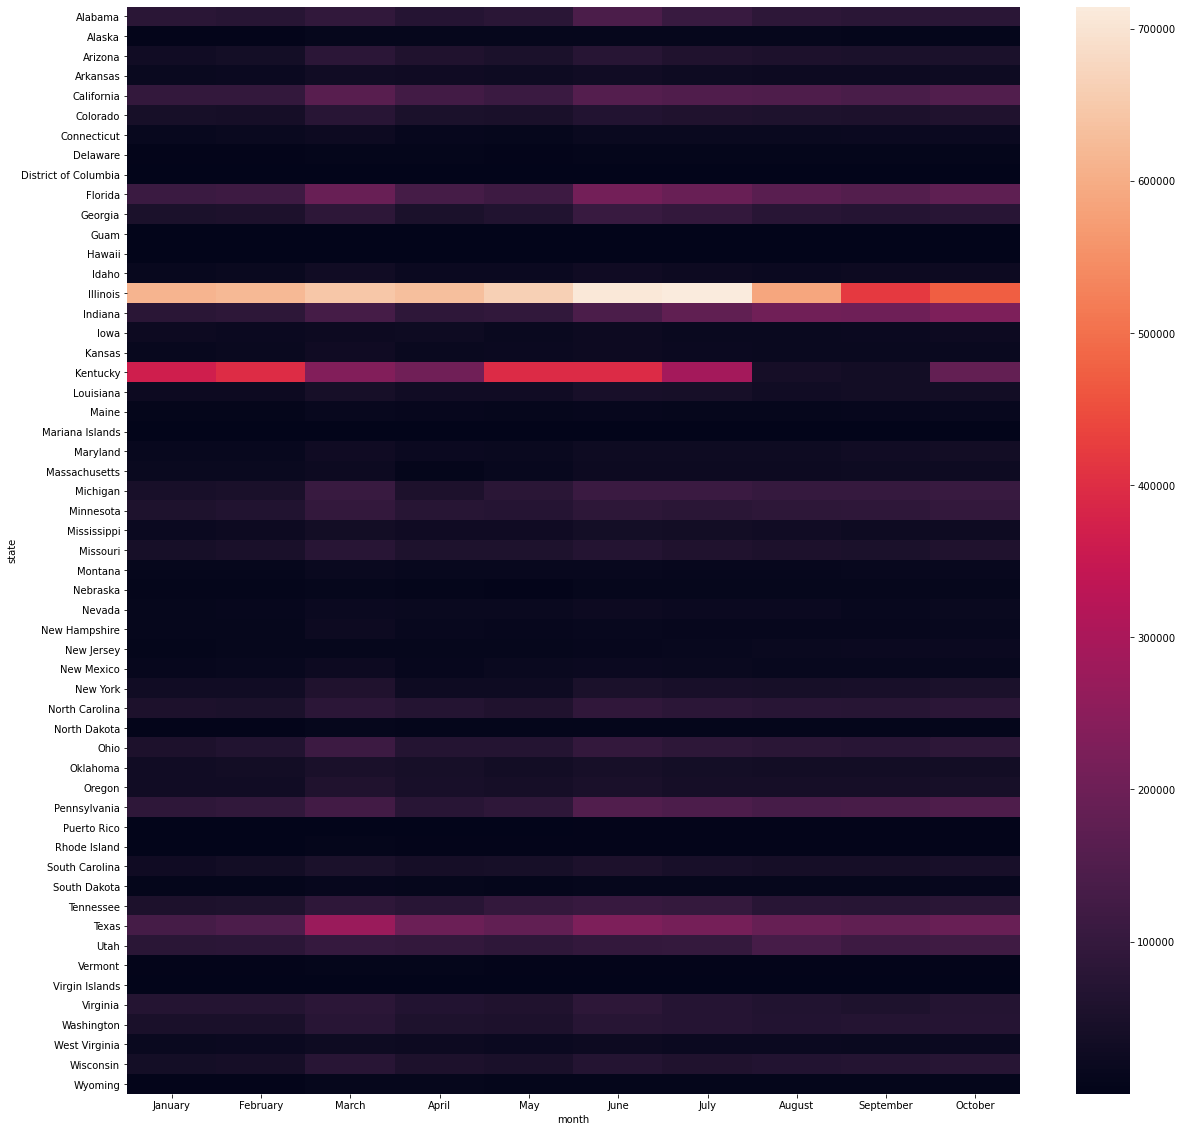

In [15]:
df_new_pivot_2020_pivot
fig, ax = plt.subplots(figsize = (20, 20))
ax = sns.heatmap(df_new_pivot_2020_pivot)

In [16]:
# df_new_pivot_2020_pivot['total'] = 0
# df_new_pivot_2020_pivot['total'] = df_new_pivot_2020_pivot.iloc[:,-11:-1].sum(axis = 1)
# to bring the index back as a column
# df_new_pivot_2020_pivot = df_new_pivot_2020_pivot.reset_index()

In [19]:
df_new_pivot_2020_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, Alabama to Wyoming
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   January    55 non-null     int64
 1   February   55 non-null     int64
 2   March      55 non-null     int64
 3   April      55 non-null     int64
 4   May        55 non-null     int64
 5   June       55 non-null     int64
 6   July       55 non-null     int64
 7   August     55 non-null     int64
 8   September  55 non-null     int64
 9   October    55 non-null     int64
 10  total      55 non-null     int64
dtypes: int64(11)
memory usage: 5.2+ KB


KeyError: 'state'

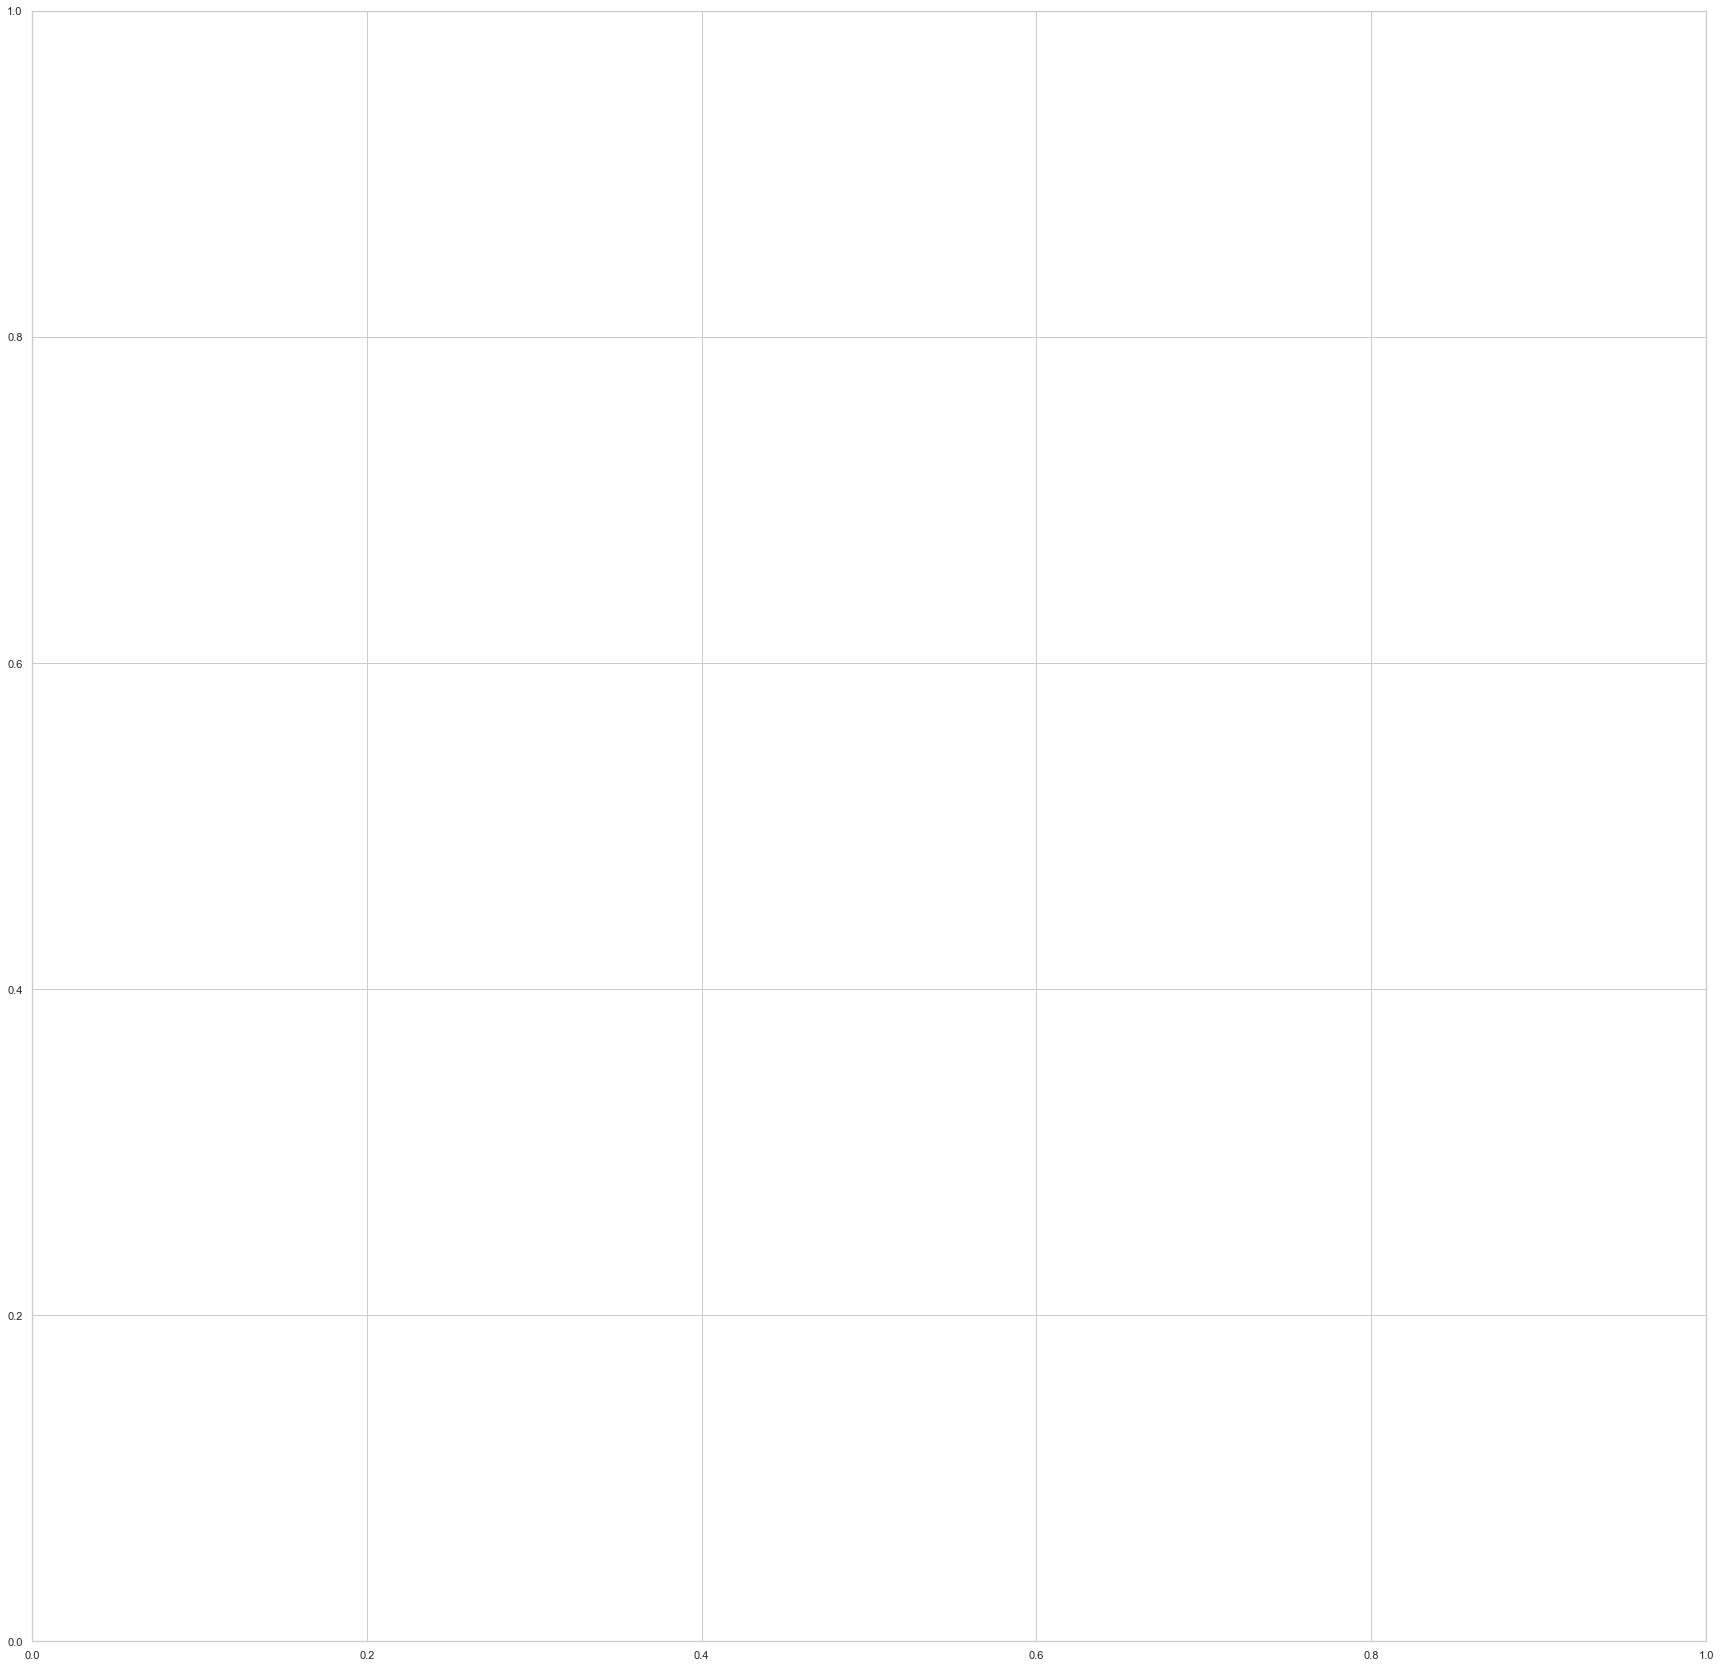

In [20]:
# #plotting histogram
# fig, ax1 = plt.subplots(figsize = (10, 10))
# ax1.hist(df_new_pivot_2019['totals'], bins=100)
# ax1.plot()

#plotting bar plot to see the states annual buying
fig, ax1 = plt.subplots(figsize = (30, 30))
sns.set_theme(style='whitegrid')
ax = sns.barplot(x = df_new_pivot_2020_pivot['state'], y = df_new_pivot_2020_pivot['total'])
# rotating the states names to display more beautifully
plt.xticks(rotation = 90)
# adding a new dashed line to set a threshold of arms buying
ax.axhline(100000, ls='--')
plt.show()


In [ ]:
#filtering the top 20 states only to help with the values

In [ ]:
import plotly.express as px

df_new

In [ ]:
url2 = 'https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv'
df_2 = pd.read_csv(url2)

df_2 = df_2[['code', 'state']]
final = pd.merge(df_new, df_2, on = 'state')
final

In [ ]:
final.sort_values(by = ['year'], ascending= True, inplace= True)

In [ ]:
fig = px.choropleth(final,locations='code',color = 'totals',animation_frame= 'year', color_continuous_scale='Inferno', locationmode='USA-states', scope = 'usa', title = 'Guns by State', height = 600)
fig.show()

In [ ]:
import chart_studio
username = 'ParviSingh' # your username
api_key = 'DnzTYZDKcRkOHSePo4kQ' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)


In [ ]:
import chart_studio.plotly as py
py.plot(fig, filename= 'Gun_Sales_US_annual', auto_open=True)

In [ ]:
'''<iframe width="900" height="800" frameborder="0" scrolling="no" src="//plotly.com/~ParviSingh/1.embed"></iframe>'''

In [ ]:
import plotly.io as pio

pio.write_html(fig, file='figure.html', auto_open=True)